## PERANCANGAN SIMULASI KENDALI VALVE DENGAN ALGORITMA LOGIKA FUZZY

####  Faisal Baja Esa Putra (09011281722043)

Salah satu aplikasi teknik instrumentasi kendali yang sering ditemukan di industri adalah control valve (katup). Hampir semua industri minyak  dan  gas  menggunakan control valve yang dikendalikan baik oleh  motor  maupun  pneumatic sebagai aktuatornya. Biasanya  yang dikendalikan adalah ketinggian, tekanan, aliran dan suhu dan salah satu  metode  kendalinya  adalah dengan menjaga level 

### Input

Suhu
- ** Dingin : ** 10 - 50 derajat celcius
- ** Normal : ** 30 - 70 derajat celcius
- ** Panas : ** 50 - 100 derajat celcius

Level Cairan
- ** Rendah : ** 10 - 50 %
- ** Sedang : ** 30 - 70 %
- ** Tinggi : ** 50 - 100 %

### Output 

Control Valve (terbuka)
- ** Kecil : ** 10 - 50 derajat
- ** sedang : ** 30 - 60 derajat
- ** besar : ** 50 - 90 derajat 

dan berikut pemogramannya

### Mengimport library untuk fuzzy

library yang digunakan antara lain adalah numpy,matplotlib.pyplot dan skfuzzy.
kita juga mengambil fungsi control dari library skfuzzy

In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Fuzzifikasi Suhu

Proses untuk mengubah variabel non numerik menjadi variabel non fuzzy (numerik) menjadi variabel fuzzy (linguistik)

Untuk suhu , fungsi keanggotaan dibagi menjadi 3 bagian :

Suhu
- ** Dingin : ** 10 - 50 derajat celcius
- ** Normal : ** 30 - 70 derajat celcius
- ** Panas : ** 50 - 100 derajat celcius



In [5]:
suhu = ctrl.Antecedent(np.arange(10,101,1), 'suhu')
suhu_x = np.arange(10,101,1) #suhu_x disini hanya di gunakan untuk ploting 


Dengan fungsi keanggotaan suhu udara

\begin{equation}
  suhu['dingin'] = \mu SuhuDingin(x)=\begin{cases}
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    suhu ['normal'] = \mu SuhuNormal(x)=\begin{cases}
    0, & \text{$x \leq 30$ atau $x \geq 70$}.\\
    (x - 30)/(50 - 30) , & \text{$30 < x \leq 50$}.\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x < 70$}.\\
  \end{cases}
  \\
    suhu['panas'] = \mu SuhuPanas(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}



In [6]:
suhu['dingin'] = fuzz.trimf(suhu.universe, [10, 10, 50])
suhu['normal'] = fuzz.trimf(suhu.universe, [30, 50, 70])
suhu['panas'] = fuzz.trimf(suhu.universe, [50, 100, 100])


### PLOTTING MEMBERSHIP FUNCTION SUHU

Plotting fungsi keanggotaan $\mu SuhuDingin(x)$

Text(0.5,1,'Suhu Dingin')

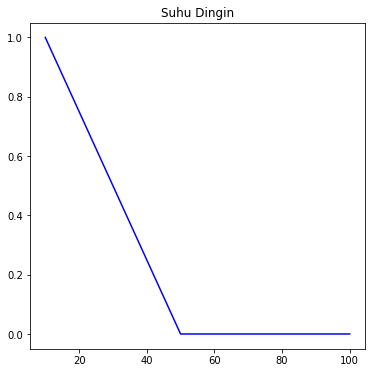

In [7]:
suhu_dingin = fuzz.trimf(suhu.universe, [10, 10, 50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_dingin,'blue')
ax0.set_title('Suhu Dingin')

Plot fungsi keanggotaan $\mu SuhuNormal(x) $

Text(0.5,1,'Suhu normal')

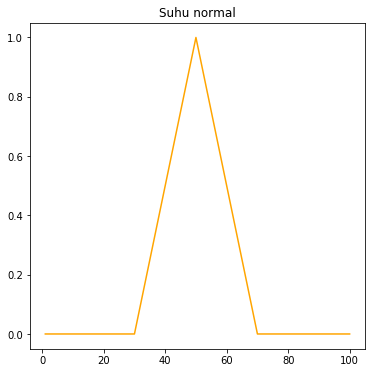

In [34]:
suhu_normal = fuzz.trimf(suhu.universe, [30, 50, 70])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(suhu_x,suhu_normal,'orange')
ax2.set_title('Suhu normal')

Plot fungsi keanggotaan $\mu SuhuPanas(x) $

Text(0.5,1,'Suhu Panas')

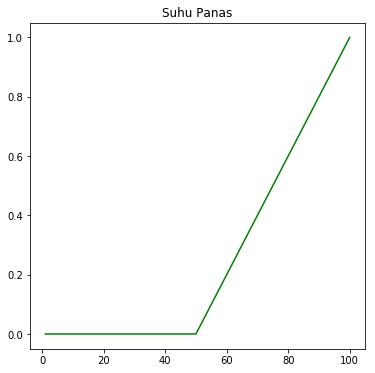

In [35]:
suhu_panas = fuzz.trimf(suhu.universe, [50, 100, 100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(suhu_x,suhu_panas,'green')
ax0.set_title('Suhu Panas')

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


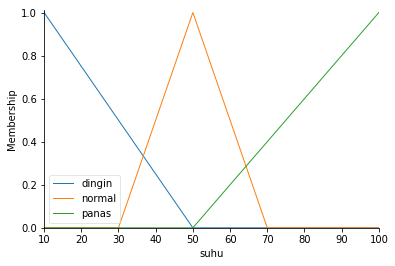

In [8]:
suhu.view()

# Fuzzifikasi Level ketinggian cairan

Level Cairan
- ** Rendah : ** 10 - 50 %
- ** Sedang : ** 30 - 70 %
- ** Tinggi : ** 50 - 100 %

In [9]:
level = ctrl.Antecedent(np.arange(10,101,1), 'level')
level_x = np.arange(10,101,1)


Dengan fungsi keanggotaan level ketinggian cairan


\begin{equation}
  level['rendah'] = \mu LevelRendah(x)=\begin{cases}
    (50 - x)/(50 - 10) , & \text{$10 < x < 50$}.\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    level ['sedang'] = \mu LevelSedang(x)=\begin{cases}
    0, & \text{$x \leq 30$ atau $x \geq 70$}.\\
    (x - 30)/(50 - 30) , & \text{$30 < x \leq 50$}.\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x < 70$}.\\
  \end{cases}
  \\
    Level['tinggi'] = \mu LevelTinggi(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}




In [22]:
level['rendah'] = fuzz.trimf(level.universe, [1, 1, 50])
level['sedang'] = fuzz.trimf(level.universe, [30, 50, 70])
level['tinggi'] = fuzz.trimf(level.universe, [50, 100, 100])

### PLOTTING MEMBERSHIP FUNCTION LEVEL KETINGGIAN CAIRAN

Plotting fungsi keanggotaan $\mu LevelRendah(x)$

Text(0.5,1,'Level Cairan Rendah')

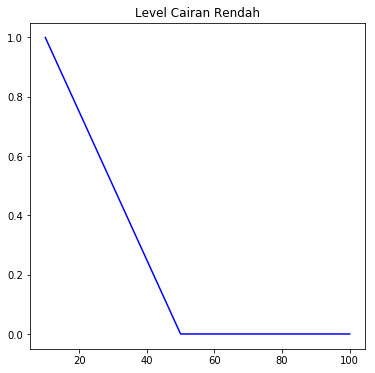

In [23]:
level_rendah = fuzz.trimf(level.universe, [10, 10, 50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(level_x,level_rendah,'blue')
ax0.set_title('Level Cairan Rendah')

Plotting fungsi keanggotaan $\mu LevelSedang(x)$

Text(0.5,1,'Level Cairan Sedang')

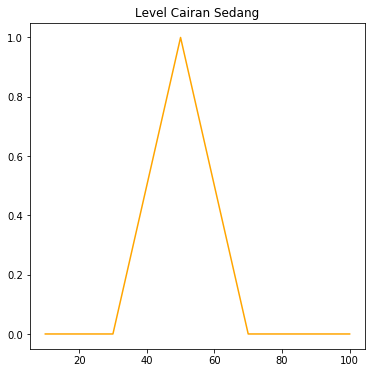

In [24]:
level_sedang = fuzz.trimf(level.universe, [30, 50, 70])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(level_x,level_sedang,'orange')
ax2.set_title('Level Cairan Sedang')

Plotting fungsi keanggotaan $\mu LevelTinggi(x)$

Text(0.5,1,'Level Cairan Tinggi')

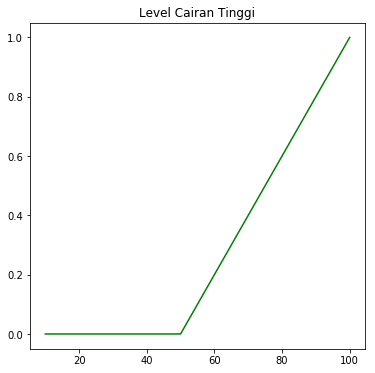

In [25]:
level_tinggi = fuzz.trimf(level.universe, [50, 100, 100])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(level_x,level_tinggi,'green')
ax0.set_title('Level Cairan Tinggi')

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


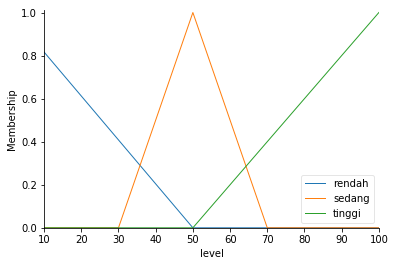

In [26]:
level.view()

# Fuzzifikasi Derajat Terbukanya Valve

Untuk Control valve terbagi menjadi tiga bagian yaitu :
Control Valve (terbuka)
- ** Kecil  : ** 1 - 50 derajat
- ** sedang : ** 40 - 60 derajat
- ** besar : ** 50 - 90 derajat 


In [27]:
valve = ctrl.Consequent(np.arange(1,91,1),'valve')
valve_x = np.arange(1,91,1)

Dengan fungsi keanggotaan Control Derajat terbukanya valve


\begin{equation}
  valve['kecil'] = \mu ValveKecil(x)=\begin{cases}
    (50 - x)/(50 - 1) , & \text{$1 < x < 50$}.\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    valve ['sedang'] = \mu ValveSedang(x)=\begin{cases}
    0, & \text{$x \leq 40$ atau $x \geq 60$}.\\
    (x - 40)/(50 - 40) , & \text{$40 < x \leq 50$}.\\
    (60 - x)/(60 - 50) , & \text{$50 \leq x < 60$}.\\
  \end{cases}
  \\
    valve['besar'] = \mu ValveBesar(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(90 - 50) , & \text{$50 < x < 90$}.\\
    1, & \text{$x\geq 90$}.
  \end{cases}
\end{equation}


In [28]:
valve['kecil'] = fuzz.trimf(valve.universe, [1, 1, 50])
valve['sedang'] = fuzz.trimf(valve.universe, [40, 50, 60])
valve['besar'] = fuzz.trimf(valve.universe, [50, 90, 90])

### PLOTTING MEMBERSHIP DERAJAT TERBUKANYA VALVE

Plotting fungsi keanggotaan $\mu ValveKecil(x)$

Text(0.5,1,'Derajat Valve Kecil')

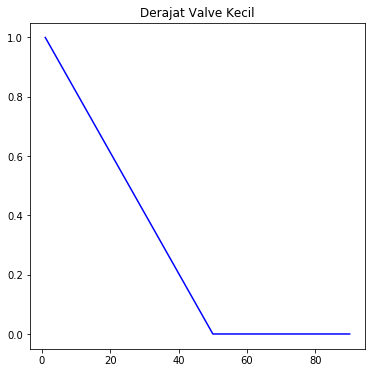

In [29]:
valve_kecil = fuzz.trimf(valve.universe, [1, 1, 50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(valve_x,valve_kecil,'blue')
ax0.set_title('Derajat Valve Kecil')

Plotting fungsi keanggotaan $\mu ValveSedang(x)$

Text(0.5,1,'Derajat Valve Sedang')

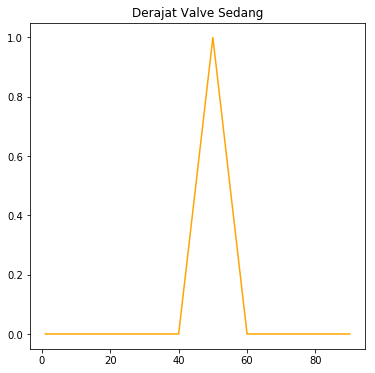

In [30]:
valve_sedang = fuzz.trimf(valve.universe, [40, 50, 60])
fig3, (ax2) = plt.subplots(nrows=1,figsize=(6,6))
ax2.plot(valve_x,valve_sedang,'orange')
ax2.set_title('Derajat Valve Sedang')

Plotting fungsi keanggotaan $\mu ValveBesar(x)$

Text(0.5,1,'Derajat Valve Besar')

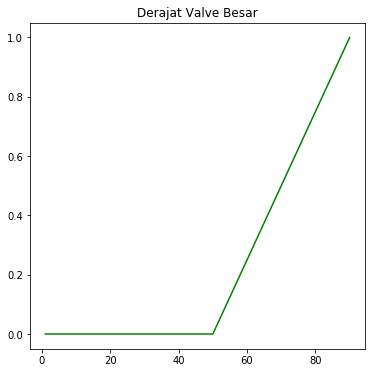

In [31]:
valve_besar = fuzz.trimf(valve.universe, [50, 90, 90])
fig,(ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(valve_x,valve_besar,'green')
ax0.set_title('Derajat Valve Besar')

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


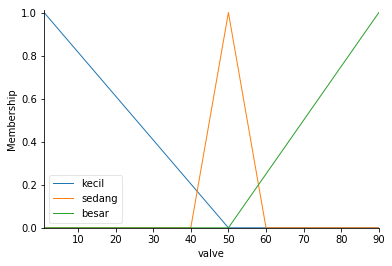

In [32]:
valve.view()

# Inferencing
Pada tahap inferencing, membuat aturan-aturan fuzzy yang dinyatakan dalam bentuk IF .... THEN ....

Rule-1 : IF Suhu Dingin Dan Level  Tinggi THEN Valve buka Kecil  
Rule-2 : IF Suhu Dingin Dan Level  Rendah THEN Valve buka Sedang  
Rule-3 : IF Suhu Dingin Dan Level  Sedang THEN Valve buka Kecil  
Rule-4 : IF Suhu Normal Dan Level  Tinggi THEN Valve buka Kecil  
Rule-5 : IF Suhu Normal Dan Level  Rendah THEN Valve buka Sedang  
Rule-6 : IF Suhu Normal Dan Level  Sedang THEN Valve buka Sedang  
Rule-7 : IF Suhu Panas  Dan Level  Tinggi THEN Valve buka Kecil  
Rule-8 : IF Suhu Panas  Dan Level  Rendah THEN Valve buka Besar  
Rule-9 : IF Suhu Panas  Dan Level  Sedang THEN Valve buka Sedang  

In [33]:
rule1 = ctrl.Rule(suhu['dingin'] & level['tinggi'],valve['kecil'])
rule2 = ctrl.Rule(suhu['dingin'] & level['rendah'],valve['sedang'])
rule3 = ctrl.Rule(suhu['dingin'] & level['sedang'],valve['kecil'])

rule4 = ctrl.Rule(suhu['normal'] & level['tinggi'],valve['kecil'])
rule5 = ctrl.Rule(suhu['normal'] & level['rendah'],valve['sedang'])
rule6 = ctrl.Rule(suhu['normal'] & level['sedang'],valve['sedang'])

rule7 = ctrl.Rule(suhu['panas'] & level['tinggi'],valve['kecil'])
rule8 = ctrl.Rule(suhu['panas'] & level['rendah'],valve['besar'])
rule9 = ctrl.Rule(suhu['panas'] & level['sedang'],valve['sedang'])

# RULE EVALUATION

In [34]:
valve_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9])

# DEFUZZIFIKASI

In [35]:
terbuka = ctrl.ControlSystemSimulation(valve_ctrl)

penginputan data dimana input suhu adalah 40 derajat dan level cairan 60%

In [46]:
terbuka.input['suhu'] = 40
terbuka.input['level'] = 60

Melakukan perhitungan defuzzifikasi

In [47]:
terbuka.compute()

Mencetak hasil output defuzzifikasi

In [48]:
print (terbuka.output['valve'])

33.38655095836605


Plotting fungsi keanggotaan suhu setelah ketika di input kedalam sistem simulasi

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


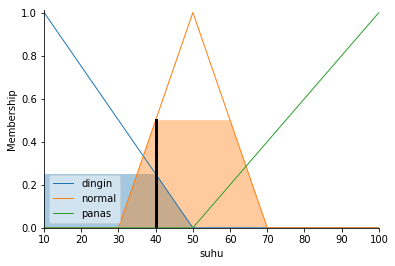

In [49]:
suhu.view(sim=terbuka)

Plotting fungsi keanggotaan level cairan setelah ketika di input kedalam sistem simulasi

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


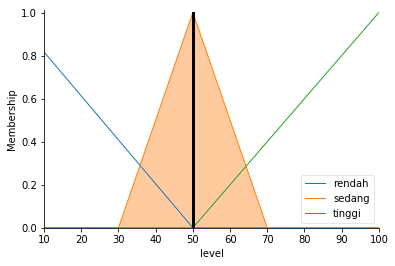

In [40]:
level.view(sim=terbuka)

Plotting fungsi keanggotaan Derajat terbukanya Valve setelah dilakukan perhitungan defuzzifikasi 

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


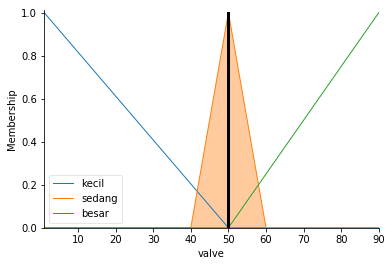

In [41]:
valve.view(sim=terbuka)

# Perhitungan Manual


### Input Nilai Suhu kedalam fungsi keanggotan Suhu 
### Suhu = 40


Dengan fungsi keanggotaan suhu udara

\begin{equation}
  suhu['dingin'] = \mu SuhuDingin(x)=\begin{cases}
    (50 - x)/(50 - 1) , & \text{$1 < x < 50$}.\checkmark\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    suhu ['normal'] = \mu SuhuNormal(x)=\begin{cases}
    0, & \text{$x \leq 30$ atau $x \geq 70$}.\\
    (x - 30)/(50 - 30) , & \text{$30 < x \leq 50$}.\checkmark\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x < 70$}.\\
  \end{cases}
  \\
    suhu['panas'] = \mu SuhuPanas(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}



$\mu SuhuDingin(x)$ (40) = (50 - 40)/(50 - 1)   
$\mu SuhuDingin(x)$ (40) = 0,2040816326530612

$\mu SuhuNormal(x)$ (40) = (40 - 30)/(50 - 30)     
$\mu SuhuNormal(x)$ (40) = 0.5



### Input Nilai Level Cairan kedalam fungsi keanggotan Level 
### level = 60

\begin{equation}
  level['rendah'] = \mu LevelRendah(x)=\begin{cases}
    (50 - x)/(50 - 1) , & \text{$1 < x < 50$}.\\
    0, & \text{$x > 50$}.
  \end{cases}
  \\
    level ['sedang'] = \mu LevelSedang(x)=\begin{cases}
    0, & \text{$x \leq 30$ atau $x \geq 70$}.\\
    (x - 30)/(50 - 30) , & \text{$30 < x \leq 50$}.\\
    (70 - x)/(70 - 50) , & \text{$50 \leq x < 70$}.\checkmark\\
  \end{cases}
  \\
    Level['tinggi'] = \mu LevelTinggi(x)=\begin{cases}
    0, & \text{$x < 50$}.\\
    (x - 50)/(100 - 50) , & \text{$50 < x < 100$}.\checkmark\\
    1, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}

$\mu LevelSedang(x)$ (60) = (70 - 60)/(70 - 50)   
$\mu LevelSedang(x)$ (60) = 0.5

$\mu LevelTinggi(x)$ (60) = (60 - 50)/(100 - 50)     
$\mu LevelTinggi(x)$ (60) = 0.2


# Rule Evaluation

1. Suhu Dingin (0.2040816326530612) & Level Sedang (0.5) = Valve Kecil (0.2040816326530612)
2. Suhu Dingin (0.204) & Level Tinggi (0.2) = Valve Kecil (0.2)
3. Suhu Normal (0.5) & Level Sedang (0.5) = Valve Sedang (0.5)
4. Suhu Normal (0.5) & Level Tinggi (0.2) = Valve Kecil (0.2)

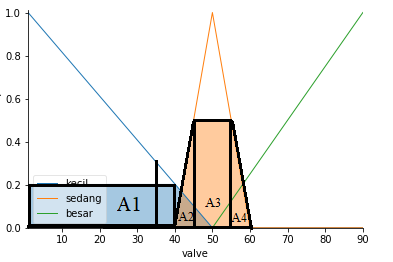

 ## $$Hasil = \frac { \sum A_1 X_1}
  {\sum A_1}$$

Untuk mencari nilai A kita dapat menggunakan beberapa rumus 
jika A berbentuk Persegi Panjang maka rumus yang di gunakan adalah
$$ A = P \times L $$
Dan jika Nilai A berbentuk Segitiga maka rumus yang di gunakan adalah
$$ A = \frac  {1} {2}   (P \times L) $$ 

Rentang Nilai A 
$$ A1 = 1 - 40 $$
$$ A2 = 40 - 45 $$
$$ A3 = 45 - 55 $$
$$ A4 = 55 - 60 $$

Mencari Nilai A1   
 $ A1 = P \times L $  
 $ A1 = 39 \times 0.2040816326530612 $  
 $ A1 = 7.959183673469388‬ $  
 
 Mencari Nilai A2   
 $ A2 = \frac  {1} {2}   (P \times L) $    
 $ A2 = \frac  {1} {2}   (5 \times 0.5) $   
 $ A2 = 1.25 ‬ $  
 
 Mencari Nilai A3   
 $ A3 = P \times L $  
 $ A3 = 5\ \times 0.5 $  
 $ A3 = 2.5 ‬ $  
 
  Mencari Nilai A4   
 $ A4 = \frac  {1} {2}   (P \times L) $    
 $ A4 = \frac  {1} {2}   (5 \times 0.5) $   
 $ A4 = 1.25 ‬ $  

untuk mencari Nilai X nya Kita akan menunggunakan rumus beberapa rumus,
jika daerah x yang ingin kita cari nilai nya berbentuk segitiga makan rumus yang di gunakan adalah :
- $ X = a + \frac  {2} {3}   (b - a) $ untuk segitiga yang memiliki tinggi di bagian kanan (gambar area A)  dan
- $ X = a + \frac  {1} {3}   (b - a) $ untuk segitiga yang memiliki tinggi di bagian kiri (gambar area A)  

jika daerah x yang ingin kita cari nilai nya berbentuk Persegi Panjang makan rumus yang di gunakankan adalah   
- $ X = \frac  {1} {2}   (b + a) $

#### catatan
- a adalah batas bawah dari suatu area 
- b adalah batas atas dari suatu area

mencari nilai X1  
$ X1 = \frac  {1} {2}   (b + a) $   
$ X1 = \frac  {1} {2}   (40 + 1) $  
$ X1 = \frac  {41} {2}  $  
$ X1 = 20.5 $  

mencari nilai X2  
$ X2 = a + \frac  {2} {3}   (b - a) $  
$ X2 = 40 + \frac  {2} {3}   (45 - 40) $  
$ X2 = 40 + \frac  {5} {3}  $    
$ X2 = 40 + 1.667‬  $   
$ X2 = 41.667‬  $  

mencari nilai X3  
$ X3 = \frac  {1} {2}   (b + a) $   
$ X3 = \frac  {1} {2}   (55 + 45) $  
$ X3 = \frac  {100} {2}  $  
$ X3 = 50 $  

mencari nilai X4   
$ X4 = a + \frac  {1} {3}   (b - a) $   
$ X4 = 55 + \frac  {1} {3}   (60 - 55) $   
$ X4 = 55 + \frac  {5} {3}  $
$ X4 = 55 + 1.667‬ $   
$ X4 = 56.667‬  $

  $$Hasil = \frac { \sum A_1 X_1}
  {\sum A_1}$$  
  
$$Hasil = \frac { A_1 \times X_1 + A_2 \times X_2 + A_3 \times X_3 + A_4 \times X_4 } {A_1 + A_2 + A_3 + A_4} $$  

$$Hasil = \frac { 7.959183673469387‬ \times 20.5 + 1.25 \times 41.667 + 2.5 \times 50 + 1.25 \times 56.667 } {7.959183673469387 + 1.25 + 2.5 + 1.25} $$   

$$Hasil = \frac { 163.1632653061224‬ + 52,0834 + 125 + 70,834 } {12.95918367346939‬‬} $$ 

$$Hasil = \frac {411,0799319727891‬} {12,95918367346939‬} $$ 

$$Hasil =  $$ 



In [ ]:
34.88098965127404